# Assignment 3

Due Date:  11:59pm on Friday, November 13th (for now)

There are some subtle issues to worry about in each of these questions, and thus I
will be discussing each problem in class on Monday, November 9th.

## Question 1 - Fourier Analysis

Consider the following triangular pulse signal:

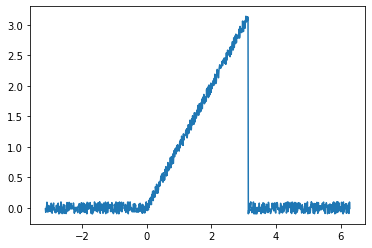

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import random

#AA
N_samples = 1000
#starts at T = -pi 
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function
of frequency, a plot of the Fourier power spectrum as a function of frequency, and also
**a plot of the time spectrum using the Fourier components as compared to the original time spectrum**.(not done in class)

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory?  What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

Notes From class: Starts at T = -pi

In [203]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random

In [204]:
# Choose the signal frequency (0.2Hz) and the number of cycles to sample over (2) and the number of samples (50)

f_s = 0.2
N_cycles = 2.0
N_samples =1000

# Calculate the timespan
period = 1/f_s
T =  N_cycles*period

# Set the number of terms in the Fourier series (initially, equal to the number of samples, which is bad!)

N_terms = int(N_samples/25)
print(N_terms)
random.seed(1)

40


In [205]:
# Calculate the spacing (in time) between data points
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

## Theory

The function that we will choose is:

$y(t) = sin(2 \pi f_s t)$

The Fourier approximation is given by:

$y(t) \approx \frac{a_0}{2} + \sum_{n=1}^{\infty} \left ( a_n cos(\frac{2 \pi n t}{T}) + b_n sin(\frac{2 \pi n t}{T}) \right )$

where $T$ is the time-span.

For the chosen function, we expect:

$a_0 = 0$

$a_n = 0,~for~all~n$

Since we have a single sine wave with with frequency, $f_s$, we would expect one of the $b_n$ values to be non-zero, and the rest zero.  The value of n for the single non-zero $b_n$ value can be calculated from:

$2 \pi f_s = \frac{2 \pi n}{T}$

$n = T\cdot f_s = (0.2)(10.0) = 2$

Thus, we expect:

$b_2 = 1, and~all~other~b_n=0$

In [206]:
# Create the data set.  Add a little bit of random noise into the signal.

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
    
print (y,f,t)

[-7.31271512e-02  6.94867474e-02  5.27549238e-02 -4.89861949e-02
 -9.12982582e-04 -1.01017870e-02  3.03185945e-02  5.77446702e-02
 -8.12280826e-02 -9.43305047e-02  6.71530208e-02 -1.34465864e-02
  5.24560165e-02 -9.95787893e-02 -1.09225612e-02  4.43080065e-02
 -5.42475557e-02  8.90541391e-02  8.02854915e-02 -9.38820034e-02
 -9.49108278e-02  8.28249456e-03  8.78298326e-02 -2.37591525e-02
 -5.66801206e-02 -1.55766849e-02 -9.41918425e-02 -5.56616667e-02
 -1.24224813e-02 -8.37551724e-04 -5.33831099e-02 -5.38266917e-02
 -5.62437925e-02 -8.07930685e-03 -4.20436771e-02 -9.57020589e-02
  6.75155951e-02  1.12908645e-02  2.84588726e-02 -6.28187468e-02
  9.85086824e-02  7.19893058e-02 -7.58220080e-02 -3.34609629e-02
  4.42968815e-02  4.22383539e-02  8.72881174e-02 -1.55786000e-02
  6.60071387e-02  3.40611133e-02 -3.93262978e-02  1.75161212e-02
  7.64958002e-02  6.92394837e-02  1.05676412e-03  1.78004516e-02
 -9.30948340e-02 -5.14520053e-02  5.94808495e-02 -1.71372001e-02
 -6.53985197e-02  9.75975

# Calculating the coefficients

We will determine the coefficients by numerical integration, according to:

$a_0 = \frac{2}{T} \int_0^T f(t) dt$

$a_n = \frac{2}{T} \int_0^T f(t) cos(\frac{2 \pi n}{T} t) dt$

$b_n = \frac{2}{T} \int_0^T f(t) sin(\frac{2 \pi n}{T} t) dt$

In [207]:
from timeit import default_timer as timer

start = timer()

# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
print ("Suscello: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

Suscello:  0.19269674899987876


In [208]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))


Average Power = 1.36 Watts.
Nyquist frequency = 50.00 Hz.


In [209]:
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
print ("Python: ",(end-start))
print("Ratio = ",btime/(end-start))

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])
    

Python:  0.0004226059991196962
Ratio =  455.9725829762785
1.0486645721367653 1.0486635721367652 1e-06 -0.0 1.0996973848557852 1.0996952875266406
-0.864585381457186 -0.8645863814571851 -0.32454833671806393 0.3245493367180633 0.8528395046959296 0.852841882965364
0.4402161617174964 0.4402151617174967 0.4474703970864946 -0.4474693970864944 0.3940200253060301 0.39401824993491247
-0.010854059274104943 -0.010855059274105213 -0.33557068628894204 0.33557168628894185 0.11272549609915734 0.11272618895064834
-0.21260921511349506 -0.21261021511349504 0.08076571807409205 -0.080764718074092 0.051725779567200134 0.05172604325619419
0.17845181195238444 0.1784508119523841 0.1273504431371036 -0.12734944313710408 0.04806318455630584 0.048062572953795665
-0.009701997452690046 -0.009702997452690309 -0.16396778685836383 0.1639687868583639 0.026979563881801834 0.026979911223370484
-0.12186040180764034 -0.12186140180764034 0.06054516284366198 -0.06054416284366191 0.0185156742724851 0.018515796904963022
0.10828

(-1.5, 1.5)

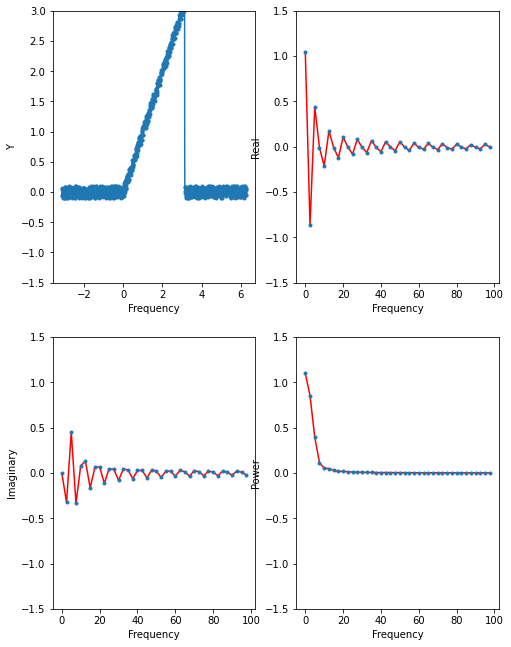

In [210]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-1.5,3)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)


 We would expect one of the  𝑏𝑛  values to be non-zero, and the rest zero. 
When using 1000 samples, our Nyquist frequency is 50.0 Hz. I played with the N_terms a lot and ended up usuing about 40 to give a close approximation to the original signal.

## Question 2 - Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream.  The frog should continue jumping until that moment when it gets to the other side of the stream.  The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?  

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [110]:
n = 10 #set number lilypads

In [111]:
random.seed(1)

In [112]:
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
eval = []
evalr = []
evalr2 = []
evalr3 = []
sigma = []
hist_vals= []

In [114]:
for npad in range(1,n+1): 

    if (npad == 1):
        eval.append(1)
        evalr.append(1)
    else:
        sum = 0.0
        for i in range(1,npad):
            #print(i,npad,eval[npad-i-1])
            sum = sum + 1.0/npad*(1.0+eval[npad-i-1])
        sum = sum + 1.0/npad
        eval.append(sum)
        #evalr.append(eval[npad-1]/npad)
        evalr.append(eval[npad-1])
    #print("Theory: ",npad,eval[npad-1])
    
    sum = 0.0
    for i in range(1,npad+1):
        sum = sum + 1.0/i
    evalr2.append(sum)
    
    x.append(npad)
    
    sum2 = 1.0/stats.hmean(x)*npad
    evalr3.append(sum2)
    
    #print (npad,sum2)
    #endpoint is set equal to npad index
    #simulate ntries times
    end = npad
    #print("New being npad: ", npad)
    for j in range(n_trys):
        while start < npad:
            #chose random number between 1,5 (in a 4 pad eample) but when cast 
            #to an int it is a number either 1,2,3,4
            #this must be modified to allow frog to jump backwards (-2-1,1,2 are his new options)
            #print("random number start: ", (0-start)+1)
            #print("random number end: ",(end-start+1))
            jump = int(random.uniform((0-start)+1,(end-start+1)))
            #print ("Jump = ",jump)
            if(jump < 0):
                #print("Less")
                #print ("Jump = ",jump)
                start = start + jump 
                #get current pad
                #print ("Now at ",start)
                jumpsum = jumpsum + 1
            elif(jump > 0):
                #print("Greater")
                #print ("Jump = ",jump)
                start = start + jump
                #get current pad
                #print ("Now at ",start)
                jumpsum = jumpsum + 1
        if(npad == 30):
          hist_vals.append(jumpsum)

        start = 0
        #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
        total_jumps = total_jumps + jumpsum
        jumpsum = 0
    
    #print (npad,total_jumps,n_trys)

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0
    
    print ("Expectation value for n = %d is %f" % (npad,expectation_value))
    

Expectation value for n = 1 is 1.000000
Expectation value for n = 2 is 1.489100
Expectation value for n = 3 is 1.842300
Expectation value for n = 4 is 2.579700
Expectation value for n = 5 is 3.467600
Expectation value for n = 6 is 4.319300
Expectation value for n = 7 is 5.360700
Expectation value for n = 8 is 6.220900
Expectation value for n = 9 is 7.282500
Expectation value for n = 10 is 8.267400


<ErrorbarContainer object of 3 artists>

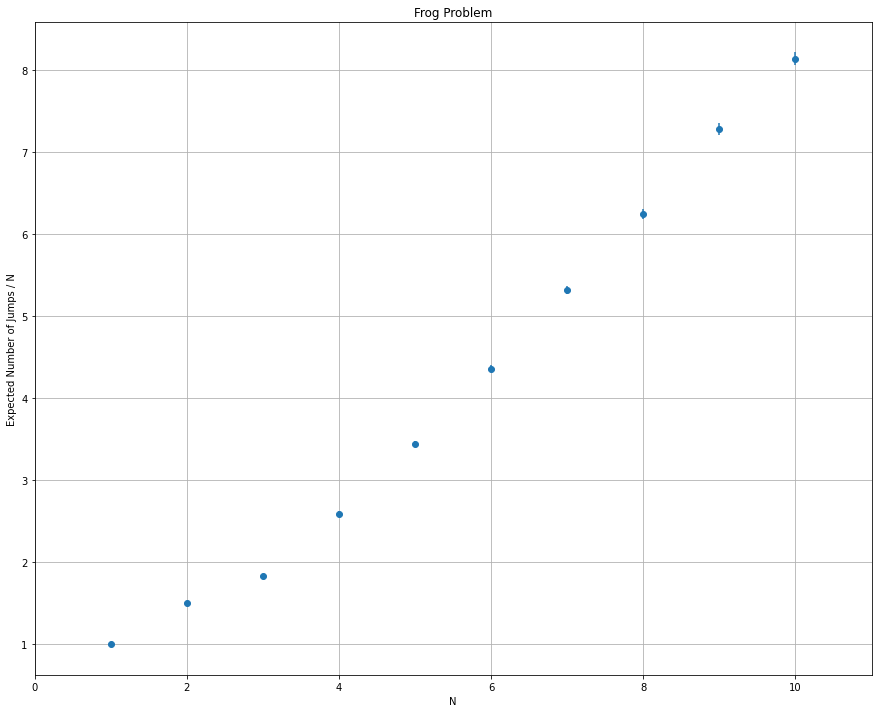

In [ ]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x


fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')
#ax1.plot(x,evalr,'r--')
#ax1.plot(x,evalr2,'b--')
#ax1.plot(x,evalr3,'g--')


The abover graph shows the simulation with 10000 tries usuing only 10 lilypads


This data is surprising to me. I expected the number of jumps to grow exponentially when a frog has the ability to jump backwards as well. I thought the frogs jumps would often exceed the number of lilypads. Secondly, when compared with a frog that can only jump forward, we see this simulations slope increase as the number of lilypads increase, while a forward jumping frog shows a decrease in slope as the number of lilypads increases.

The following histragram is done with a simulation that runs 100 times and plots the number of jumps attained during each simulation run with 30 lilypads. The second set of graphs adjust the data for easier readability

[93, 2, 32, 19, 8, 8, 56, 47, 58, 10, 37, 2, 28, 21, 14, 20, 11, 46, 18, 4, 37, 37, 132, 18, 47, 1, 16, 10, 12, 63, 30, 100, 39, 5, 55, 22, 16, 15, 1, 19, 9, 16, 3, 27, 2, 7, 69, 61, 2, 50, 42, 8, 80, 4, 29, 1, 45, 32, 46, 28, 23, 15, 11, 13, 2, 11, 42, 1, 32, 11, 62, 10, 18, 24, 2, 13, 6, 106, 8, 12, 32, 11, 4, 7, 25, 36, 38, 3, 8, 31, 13, 29, 52, 36, 17, 50, 3, 57, 13, 6]


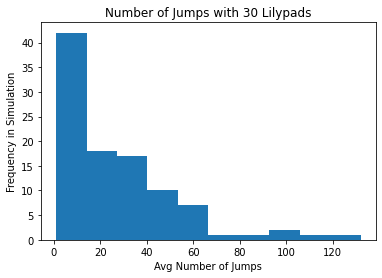

In [ ]:
print(hist_vals)
plt.hist(hist_vals)
plt.title("Number of Jumps with 30 Lilypads")
plt.xlabel('Avg Number of Jumps')
plt.ylabel('Frequency in Simulation')
plt.show()

[2, 19, 8, 8, 10, 2, 14, 11, 18, 4, 18, 1, 16, 10, 12, 5, 16, 15, 1, 19, 9, 16, 3, 2, 7, 2, 8, 4, 1, 15, 11, 13, 2, 11, 1, 11, 10, 18, 2, 13, 6, 8, 12, 11, 4, 7, 3, 8, 13, 17, 3, 13, 6]


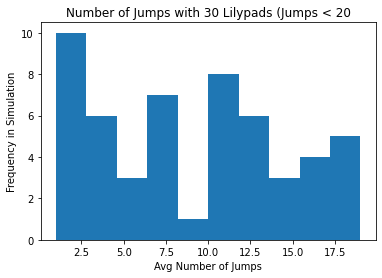

In [ ]:
less_than_20 = []
for i in hist_vals:
  if i < 20:
    less_than_20.append(i)
print(less_than_20)
plt.hist(less_than_20)
plt.title("Number of Jumps with 30 Lilypads (Jumps < 20")
plt.xlabel('Avg Number of Jumps')
plt.ylabel('Frequency in Simulation')
plt.show()

[32, 56, 47, 58, 37, 28, 21, 46, 37, 37, 47, 30, 39, 55, 22, 27, 50, 42, 29, 45, 32, 46, 28, 23, 42, 32, 24, 32, 25, 36, 38, 31, 29, 52, 36, 50, 57]


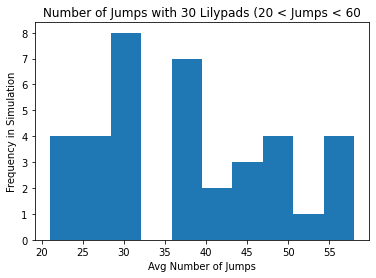

In [ ]:
less_than_20 = []
for i in hist_vals:
  if i > 20 and i < 60:
    less_than_20.append(i)
print(less_than_20)
plt.hist(less_than_20)
plt.title("Number of Jumps with 30 Lilypads (20 < Jumps < 60")
plt.xlabel('Avg Number of Jumps')
plt.ylabel('Frequency in Simulation')
plt.show()

In [ ]:
less20 = 0
less40 = 0
less60 = 0
less80= 0
greater80= 0
for i in hist_vals:
  if i < 20 :
    less20 += 1
  elif i < 40 :
    less40 += 1
  elif i < 60 :
    less60 += 1
  elif i < 80 :
    less80 += 1
  else:
    greater80 += 1

print("Between 0 - 20 jumps", less20)
print("Between 20 - 40 jumps", less40)
print("Between 40 - 60 jumps", less60)
print("Between 60 - 80 jumps", less80)
print("Greater than 80 jumps", greater80)

Between 0 - 20 jumps 53
Between 20 - 40 jumps 24
Between 40 - 60 jumps 14
Between 60 - 80 jumps 4
Greater than 80 jumps 5


## Question 3 - Random Walk

Begin with the example Jupyter Notebook called drunken_sailor.ipynb  

In the first example, we considered random walk in one dimension.  For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.  

In this question, we would like to consider a different underlying distribution for the step size.  Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1.  Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size?  Do your results agree with the predictions of the central limit theorem?

### Drunken sailors leaving a pub that is near a ditch ... 1D

A random walk is sometimes described with a drunken sailor who takes a step and then forgets which way he was going and then takes another step.  We start our sailors at $x=0$ (the pub). 

After $N$ steps we expect that the distribution of a bunch 
of sailors (all leaving the pub at the same time) and moving in 1 dimension is Gaussian in shape. The basic idea here is that sometimes the sailor will move "forward", and sometimes they will move "backward".  On average, a sailor will take as many forward as backward steps, and thus the average value will be zero.  Sometimes, though, they will take more forward steps, and sometimes they will take more backward steps, and so there will be some variation around the mean of zero.

A normalized Gaussian probability distribution with mean $\mu=0$ and dispersion $\sigma$  is 
$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-x^2/(2 \sigma^2)} $$
Here the dispersion (or standard deviation) $\sigma$ is the the square root of the variance.
The variance of a probability distribution with zero mean is
$$\sigma^2 = \int p(x) x^2 dx $$

If the dispersion of a single step is $\sigma$ then the distribution of sailors after $N$ steps is
well described by a probability distribution
$$ p(x,N) = \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} $$
with $\sigma_N = \sqrt{N}\sigma$.

Below we illustrate a code that does a 1-dimensional random walk using a sum of Gaussian distributions.  The point is here that we have $n_{part}$ sailors, and each takes $n_{steps}$ steps.  So, we just need to first calculate the final position for one sailor taking $n_{steps}$ steps, and then do that $n_{part}$ times.

The resulting distribution of drunk sailors matches the predicted Gaussian distribution.

One really cool extension of this idea is that there is something called the <b> Central Limit Theorem </b> which states that the sum of a bunch of independent variables should (in most cases)
be well described by a normal (Gaussian) distribution.

See https://en.wikipedia.org/wiki/Central_limit_theorem 

So as long as each step is generated by a well
behaved probability distribution, it does not matter what we use to generate it.  In other words we should
get the same behavior using steps generated from a normal distribution as we would if we had flipped a coin at each step, taking a step of equal length  in either direction.  Here *well behaved* means with finite mean and variance.


In [ ]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it

from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.

def walkn(nsteps):  # random walk using a normal distribution for step sizes
  #gaus distr that starts at 0, rvs is rnandom variant sample
    # r will be an aray with n eleemnts and each elemnt will be a sample 
    #each eelement in array represents a s
    #change to stats.poison.rvs but also account for negative values. 
    #See the graph you get of final posiitons
    r = stats.poisson.rvs(1, size=nsteps) 
    #print(type(r))
    # r is a vector values randomly generated with a normal distribution
    ret = 0
    for x in r:
      ran = random.randint(0,1)
      if ran == 0:
        ret += x
        flag = False
      else:
        ret -= x
        flag = True
    return ret  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!
    #new final pos every time we call it 

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
#either a single sialor does this multiple times or x sailors doing this once
def npart_walkn(npart,nsteps): 
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


Text(0, 0.5, 'p(x)')

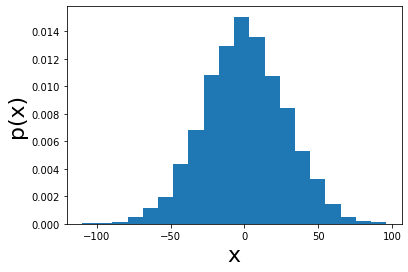

In [ ]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!


After 100 steps of random walk 1000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).

Text(0, 0.5, 'p(x)')

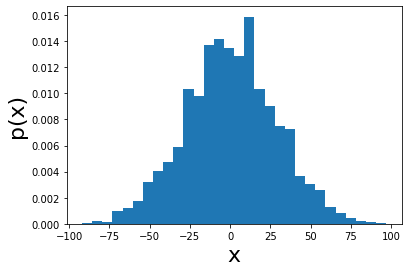

In [ ]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)




### Random walk with a ditch

If there is a post at $x_p>0$ the fraction of sailors currently past the post after $N$ steps of size chosen with dispersion $\sigma$ is

\begin{align*}
 f(x_p,N) &= \int_{x_p}^\infty \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} dx \\
 &= \int_{x_p/(\sqrt{2}\sigma_N)}^\infty \frac{1}{\sqrt{\pi}}e^{-z^2} dz\\
 &= \frac{1}{2} {\rm erfc}\left( \frac{x_p}{\sqrt{2}\sigma_N} \right)
\end{align*}
with $\sigma_N = \sqrt{N} \sigma$.

The complimentary error function is defined as
$$ {\rm erfc}(y) \equiv \frac{2}{\pi} \int_y^\infty  e^{-t^2} dt $$

<img src="https://github.com/brash99/phys421/blob/master/JupyterNotebooks/drunken_sailor.png?raw=1">

We now place a ditch at a particular $x$ 
location, $x_{ditch}$  which we take to be $>0$.   
If a drunken sailor steps into the ditch then he can't get out and sleeps there until morning.

<ol> 
<li>
We start by computing a probability distribution of remaining sailors that are not in the ditch after a number of steps $N$.
It turns out that the probability distribution is not much different than a Gaussian distribution as long as
$ \sqrt{N}\sigma \ll x_{ditch} $, but as $N$ increases, the distribution becomes lopsided.  We shoudl make sure the distribution is normalized (integrates to 1),
</li>

<li>
We can now calculate, as a function of of numbers of steps $N$, the fraction of sailors left in the ditch. 
</li>
 
We can estimate the fraction of drunk sailors that
have fallen into the ditch  by integrating the tail of the  probability density distribution in the absence of the ditch. 

As above we estimate that the fraction of sailors in the ditch after $N$ steps is described with this function 
$$ f(x_{ditch},N ) \sim \frac{1}{2} {\rm erfc}\left( \frac{x_{ditch}}{\sqrt{2}\sigma_N} \right)$$

The erfc function is available as *math.erfc()*

<li>
As a function of the number of steps $N$, we can compare the numerically measured fraction of sailors in the ditch to
the function $f(x_{ditch}, N )$
 computed with the complimentary error function.

We will see that the analytical estimate is incorrect. In fact, many more sailors wind up in the ditch!
</li>
</ol>

For N=60 and $x_{ditch}=10$, we that find that about twice as many sailors wind up in the ditch as incorrectly
predicted with this formula.

Physicists have exploited this analogy to trap atoms in a potential well using thermal motions.



(array([ 0.85106383,  0.42553191,  0.        ,  0.42553191,  1.70212766,
         2.55319149,  2.9787234 ,  2.12765957,  3.40425532,  4.68085106,
         2.9787234 , 11.4893617 , 10.63829787, 10.63829787, 22.12765957,
        11.4893617 , 16.17021277, 31.91489362, 20.42553191, 34.46808511,
        20.85106383, 22.9787234 , 29.78723404, 22.12765957, 20.        ,
        27.23404255, 14.89361702, 11.4893617 , 17.87234043, 10.63829787,
         8.08510638,  9.78723404,  3.82978723,  5.95744681,  3.40425532,
         1.27659574,  0.42553191,  2.12765957,  0.85106383,  0.42553191]),
 array([0.533  , 0.53535, 0.5377 , 0.54005, 0.5424 , 0.54475, 0.5471 ,
        0.54945, 0.5518 , 0.55415, 0.5565 , 0.55885, 0.5612 , 0.56355,
        0.5659 , 0.56825, 0.5706 , 0.57295, 0.5753 , 0.57765, 0.58   ,
        0.58235, 0.5847 , 0.58705, 0.5894 , 0.59175, 0.5941 , 0.59645,
        0.5988 , 0.60115, 0.6035 , 0.60585, 0.6082 , 0.61055, 0.6129 ,
        0.61525, 0.6176 , 0.61995, 0.6223 , 0.62465, 0.627 

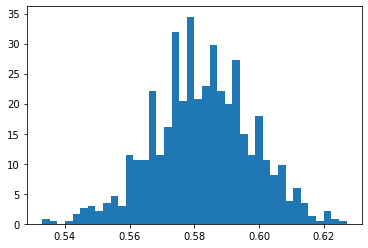

In [ ]:
def walk_ditch(xditch,nsteps,sigma):  # random walk using a normal distribution for step sizes
    #REPLACE this again with poison
    r = stats.poisson.rvs(1, size=nsteps) 
    #print(type(r))
    # r is a vector values randomly generated with a normal distribution
    z = []
    flag = False
    for x in r:
      ran = random.randint(0,1)
      if(ran == 0):
        z.append(x)
        flag = False
      else:
        flip = x*-1
        z.append(flip)
        flag = True  
    
    xpos = 0.0
    for i in range(nsteps):
        xpos += z[i]
        if xpos>xditch:
            return False
    return True
    
def npart_walk_ditch(npart,xditch,nsteps,sigma):
    
    survive_sum = 0.0
    xvec = np.zeros(0)
    for i in range(npart):
        survive = walk_ditch(xditch,nsteps,sigma)  # a single random walk result
        if survive:
            survive_sum += 1

    survive_prob = survive_sum/npart
    return survive_prob

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 1.0*np.sqrt(nsteps)*sigma

N_trials = 1000

sprobdist = []

for i in range(N_trials):
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(prob)

plt.hist(sprobdist,bins=40,density=True)

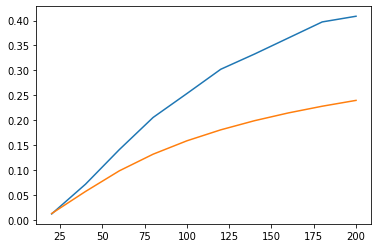

In [ ]:
#Use the new poson dis to create these graphs 
#do not need to go to 2D part
nstepsarray = np.array([20,40,60,80,100,120,140,160,180,200]) # number of steps
npart = 10000 # number of particles (sailors) to let walk around

from math import erfc

# fill a vector with npart walkers each walking nsteps

sigma = 1.0
xditch = 10

sprobdist = []
sprobtheory = []

for nsteps in nstepsarray:
    prob = npart_walk_ditch(npart,xditch,nsteps,sigma)
    sprobdist.append(1-prob)
    
    sigma_N = np.sqrt(nsteps)*sigma
    sprobtheory.append(0.5*erfc(xditch/(np.sqrt(2)*sigma_N)))

plt.plot(nstepsarray,sprobdist)
plt.plot(nstepsarray,sprobtheory)


As we increase in steps for the drunken sailors our data deviates more and more from the gaussian distribution. It seems the gaussian distribution is better suited for this experiment. I do not believe this agrees with the Central limit theorem as my results as the larger my random samples were from the population the less normal my distribution became.